In [1]:
#handle warnings
import warnings
warnings.filterwarnings("ignore")

import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

import pandas as pd            #for DataFrame and analysis
import geopandas as gpd        #for mapping and spatial aggregation

import matplotlib.pyplot as plt  #use matplotlib to modify the plots (e.g. make them larger) 

In [4]:
tq_rl = gpd.read_file("../data/inputs/roads/oproad_essh_gb/tq/TQ_RoadLink.shp")

In [5]:
tq_rl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 447929 entries, 0 to 447928
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fictitious  447929 non-null  object  
 1   identifier  447929 non-null  object  
 2   class       447929 non-null  object  
 3   roadNumber  61306 non-null   object  
 4   name1       347950 non-null  object  
 5   name1_lang  0 non-null       object  
 6   name2       0 non-null       object  
 7   name2_lang  0 non-null       object  
 8   formOfWay   447929 non-null  object  
 9   length      447929 non-null  int64   
 10  primary     447929 non-null  object  
 11  trunkRoad   447929 non-null  object  
 12  loop        447929 non-null  object  
 13  startNode   447929 non-null  object  
 14  endNode     447929 non-null  object  
 15  structure   135 non-null     object  
 16  nameTOID    347950 non-null  object  
 17  numberTOID  61306 non-null   object  
 18  function    4479

In [6]:
pd.unique(tq_rl['class'])

array(['Unknown', 'Motorway', 'Not Classified', 'Unclassified', 'A Road',
       'Classified Unnumbered', 'B Road'], dtype=object)

In [8]:
tq_manda = tq_rl[(tq_rl['class']=='Motorway') | (tq_rl['class']=='A Road')]

In [9]:
tq_manda.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 45070 entries, 1 to 447900
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fictitious  45070 non-null  object  
 1   identifier  45070 non-null  object  
 2   class       45070 non-null  object  
 3   roadNumber  45070 non-null  object  
 4   name1       40539 non-null  object  
 5   name1_lang  0 non-null      object  
 6   name2       0 non-null      object  
 7   name2_lang  0 non-null      object  
 8   formOfWay   45070 non-null  object  
 9   length      45070 non-null  int64   
 10  primary     45070 non-null  object  
 11  trunkRoad   45070 non-null  object  
 12  loop        45070 non-null  object  
 13  startNode   45070 non-null  object  
 14  endNode     45070 non-null  object  
 15  structure   49 non-null     object  
 16  nameTOID    40539 non-null  object  
 17  numberTOID  45070 non-null  object  
 18  function    45070 non-null  object  


<AxesSubplot:>

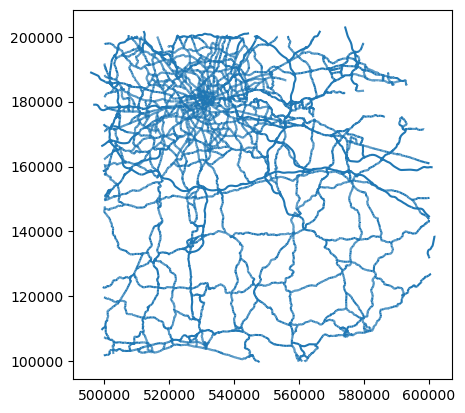

In [10]:
tq_manda.plot()

NameError: name 'lad_gdf' is not defined

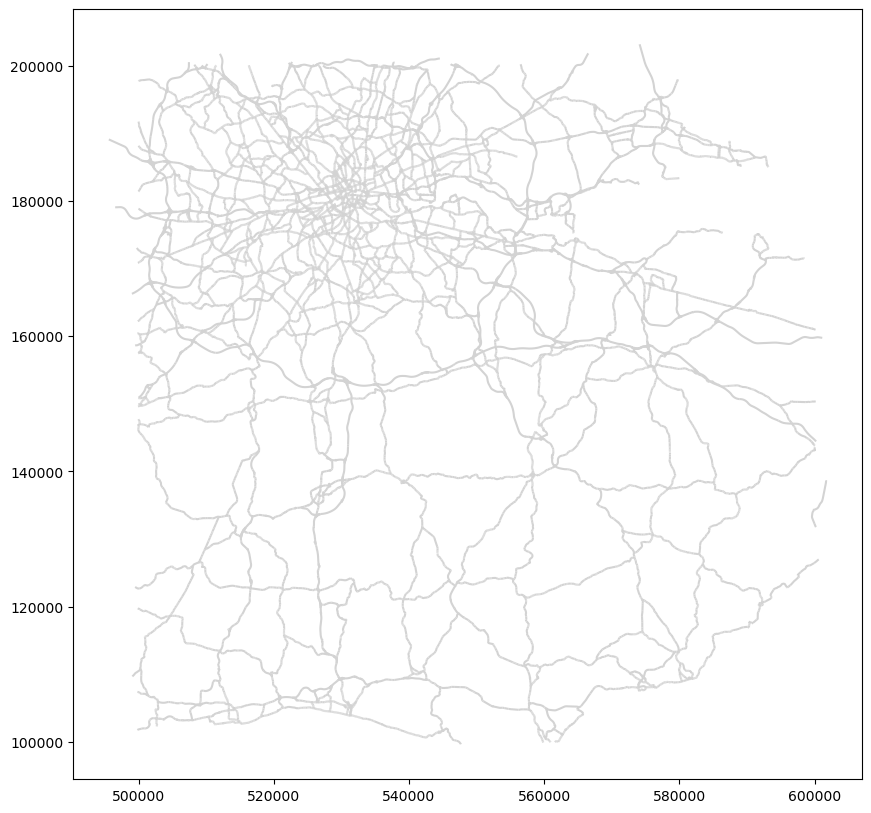

In [11]:
xlims=[500000, 565000]
ylims=[155000, 205000]

fig, ax1 = plt.subplots(1, figsize=(12, 10))  

tq_manda.plot(ax=ax1, column="class", edgecolor="lightgrey", zorder=1)

lad_gdf.plot(ax=ax1, facecolor="none", edgecolor="black", zorder=2)

ax1.set_xlim(xlims)
ax1.set_ylim(ylims) 

In [ ]:
mrn18 = gpd.read_file("data/Major_Road_Network_2018_Open_Roads/Major_Road_Network_2018_Open_Roads.shp")

In [ ]:
mrn18.info()

In [ ]:
xlims=[500000, 565000]
ylims=[155000, 205000]

fig, ax1 = plt.subplots(1, figsize=(12, 10))  

gdf.plot(ax=ax1, column="id", edgecolor="k", zorder=2)

lad_gdf.plot(ax=ax1, facecolor="lightgrey", edgecolor="lightgrey", zorder=1)

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)  